In [4]:
import ssl

# This globally disables SSL certificate verification
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [6]:
housing = fetch_california_housing()

In [9]:
X = housing.data[:,0]
y = housing.target

# 2. Hyperparameters
learning_rate = 0.01
epochs = 1000
m = 0.0 #Slope
b = 0.0 # Intercept
n = float(len(X)) # Number of elements in X

In [10]:
# 3. Gradient Descent Loop
for i in range(epochs):
    # Current Prediction
    y_pred = m*X + b
    
    # Calculate Gradient (Derivatives)
    # How much m and b need to change to reduce the error
    derivative_m = (-2/n)*sum(X*(y-y_pred))
    derivative_b = (-2/n)*sum(y-y_pred)
    
    # Update m and b
    m = m -learning_rate*derivative_m
    b = b -learning_rate*derivative_b
    
# 4. Results
print(f"Final Slope (m):{m:.4f}")
print(f"Final Interception (b):{b:.4f}")


Final Slope (m):0.4197
Final Interception (b):0.4425


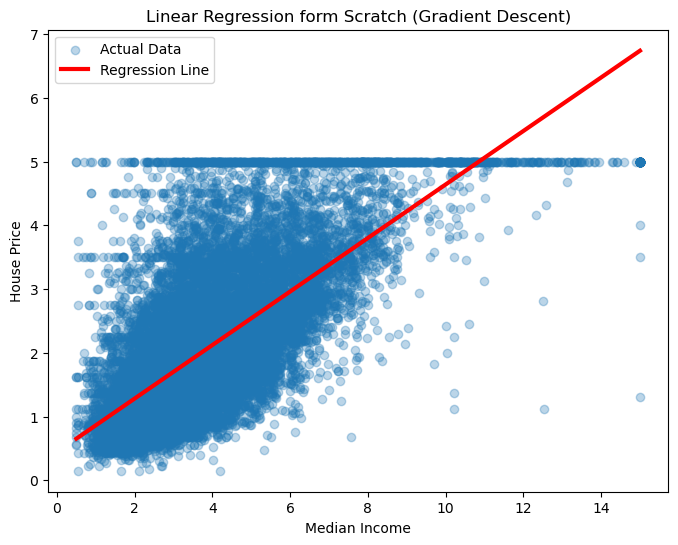

In [12]:
# 5. Visualization 
plt.figure(figsize=(8,6))
plt.scatter(X,y,alpha=0.3,label="Actual Data")
plt.plot([min(X),max(X)],[m*min(X)+b,m*max(X)+b],color = "red",lw=3,label="Regression Line")
plt.xlabel("Median Income")
plt.ylabel("House Price")
plt.legend()
plt.title("Linear Regression form Scratch (Gradient Descent)")
plt.show()

### Insurance Cost Regression

In [17]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

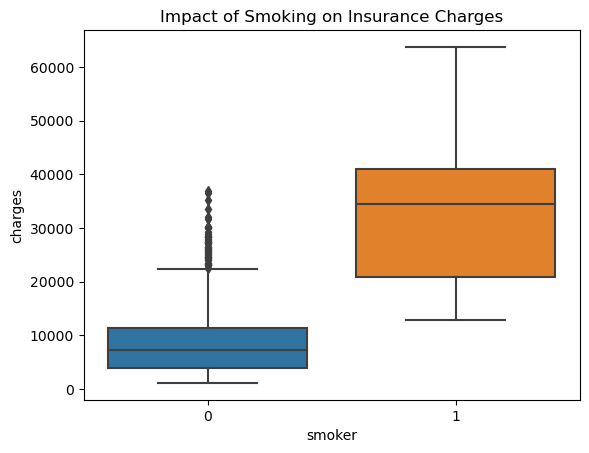

Predicted Insurance Cost for a 30yo non-smoker: $4,235.76
R2 Score: 0.78


C:\Users\Ganesh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Load the data directly from the URL
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df = pd.read_csv(url)

# 2. Preprocessing: Convert 'smoker' and 'sex' to numbers
# This is a critical step for Linear Regression!
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['sex'] = df['sex'].map({'female': 1, 'male': 0})

# 3. Exploratory Data Analysis (EDA)
# Let's see how smoking affects cost
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Impact of Smoking on Insurance Charges")
plt.show()

# 4. Define Features (X) and Target (y)
# We'll use Age, BMI, and Smoker status to predict Charges
X = df[['age', 'bmi', 'smoker']]
y = df['charges']

# 5. Split and Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# 6. Make a prediction for a NEW person
# Age: 30, BMI: 25.0, Smoker: No (0)
new_person = np.array([[30, 25.0, 0]])
prediction = model.predict(new_person)

print(f"Predicted Insurance Cost for a 30yo non-smoker: ${prediction[0]:,.2f}")

# 7. Evaluate Accuracy
y_pred = model.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")

### Medical Insurance Regression from Scratch (Matrix Method)

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the data
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df = pd.read_csv(url)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the data
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df = pd.read_csv(url)

# 2. Preprocessing (Same as before)
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

# 3. Prepare the Matrices
# We need to add a column of 1s to X to represent the 'Intercept' (the 'b' in mx+b)
n_samples = df.shape[0]
X = np.column_stack([np.ones(n_samples), df['age'].values, df['bmi'].values, df['smoker'].values])
y = df['charges'].values.reshape(-1, 1)

# 4. The Normal Equation: theta = inv(X.T @ X) @ X.T @ y
# .T is Transpose, @ is Matrix Multiplication, np.linalg.inv is Inverse
XT = X.T
theta = np.linalg.inv(XT @ X) @ XT @ y

# 5. Extract our learned parameters
intercept = theta[0][0]
coeff_age = theta[1][0]
coeff_bmi = theta[2][0]
coeff_smoker = theta[3][0]

print(f"--- Learned Parameters ---")
print(f"Intercept: {intercept:.2f}")
print(f"Age Weight: {coeff_age:.2f}")
print(f"BMI Weight: {coeff_bmi:.2f}")
print(f"Smoker Weight: {coeff_smoker:.2f}")

# 6. Make a Prediction for a new person
# Age: 30, BMI: 25.0, Smoker: No (0)
# Remember to include the 1 at the start for the intercept!
new_data = np.array([1, 30, 25.0, 0])
prediction = new_data @ theta

print(f"\nPredicted Cost for a 30yo non-smoker: ${prediction[0]:,.2f}")

--- Learned Parameters ---
Intercept: -11676.83
Age Weight: 259.55
BMI Weight: 322.62
Smoker Weight: 23823.68

Predicted Cost for a 30yo non-smoker: $4,174.97
